## Real Case "SMALL DATA"

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/img/tom1.png' width=900>

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/img/tom2.png' width=900>

In [1]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/realcase/dataset_costi.xlsx

#Target colonna "costi anno 2020"

In [2]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/realcase/dataset_costi.xlsx'

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/pandas_.png' width=500>

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = 1000
pd.set_option('future.no_silent_downcasting', True)

In [5]:
df = pd.read_excel(path, keep_default_na=False, na_values=["", " "])

In [6]:
df.apply(lambda x: x.value_counts().get('n.d.', 0))

index                0
Ragione sociale      0
costi anno 2020      0
var1               313
var2               751
                  ... 
var155             751
var156               0
var157             313
var158             751
var159               0
Length: 171, dtype: int64

In [7]:
i = 1
while i < 159:
    nomeCol = "var" + str(i)

    df[nomeCol] = df[nomeCol].replace('n.d.', np.nan)

    media_col = df[nomeCol].astype(float).mean()

    df[nomeCol] = df[nomeCol].fillna(media_col)
    i += 1

df

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90,var91,var92,var93,var94,var95,var96,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var114,var115,var116,var117,var118,var119,var120,var121,var122,var123,var124,var125,var126,var127,var128,var129,var130,var131,var132,var133,var134,var135,var136,var137,var138,var139,var140,var141,var142,var143,var144,var145,var146,var147,var148,var149,var150,var151,var152,ATECO 2007\ncodice,Indirizzo sede legale,Indirizzo sede legale - Codice postale,Indirizzo sede legale - Comune,Provincia,Indirizzo sede legale - Regione,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,71387976,23064675,20882011,14244395,2794279,2677799,2833077,14562964,14352577,8073273,0,0,0,0,0,73273,0,0,0,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,0,0,0,84978,318158,318158,0,0,0,7834908,2178851,18788146,290899,188430,570560,141846752,144110326,153086306,69193271,72220512,85886434,4033074,4033074,4033074,8874677,9644129,10513852,812758,940485,1060351,62928609,61236117,54359909,25290616,24108358,24535319,0,0,0,0,0,0,0,158005,154528,0,0,158005,29565517,29302779,22500461,0,0,0,37437,69083,1265760,145914503,148992105,149021406,1135448,1033613,392038,85824629,86758885,83651116,30573391,27161965,27459901,1892059,1841524,1807968,13310780,13264428,12114005,14296757,13558421,13421133,-823170,-507756,-530593,0,46982,114473,0,0,0,1228034,977093,1122097,783131,572136,267603,1588604,1604455,1856974,36310,-66672,135970,0,0,0,0,0,0,1870101,3257494,4594656,NaN,NaN,NaN,-3027241,1534078,3813249,229,214,207,zyx56973,via abc112,abc445,Nerviano,Milano,Lombardia,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,1602930,23503659,22973259,20946238,13368527,12404318,11085331,1850794,1693511,1060485,364872,1287356,811956,1485922,406155,248529,0,0,0,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,1583,1583,1588,1583,1583,1588,355977,43180,471450,5293624,2889766,1616895,408806,551290,687712,90370961,88141721,80612876,21212948,18327864,16372048,9000000,9000000,8000000,539412,878366,1154727,555689,586514,594299,65207408,68150008,62242345,14133394,10404117,12898505,29430949,39612215,32870407,14133394,10404117,12898505,29430949,39612215,32870407,14133394,10404117,12898505,16595959,12520527,13143079,0,0,0,2855504,198969,249457,142727898,150222876,166417107,2028227,778100,3166950,102237238,113037130,131392006,11501816,11119691,13728039,1290053,1340018,1338016,16889643,15833127,15986500,2713441,2434423,2180861,3207072,1304536,-3015558,0,0,627379,0,0,0,912728,1042592,1058524,80006,47390,35171,769967,895916,1201286,11943,82820,1553908,0,0,0,0,0,0,1373420,1220932,1304576,NaN,NaN,NaN,1924469,2124721,2204557,454,411,456,zyx56974,via abc113,abc446,Milano,Milano,Lombardia,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,745000,51250000,51604000,50992000,23900000,25404000,26269000,69000,66000,56000,0,0,0,0,0,0,0,0,0,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,0,0,0,1801000,1761000,1171000,3000,3000,0,19082000,4224000,5958000,1596000,7000,0,121594000,116612000,113749000,24965000,25707000,23690000,5933000,5933000,5

In [8]:
colonne_inutili = ["index", "var24", "var25", "var144", "var145", "var146", "var159", "Ragione sociale",
                    "ATECO 2007\ncodice", "Indirizzo sede legale", "Indirizzo sede legale - Codice postale",
                    "Indirizzo sede legale - Comune", "Provincia", "Indirizzo sede legale - Regione", "Numero CCIAA",
                    "Codice fiscale", "Partita IVA"]
df = df.drop(colonne_inutili, axis=1, errors="ignore")
df

,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90,var91,var92,var93,var94,var95,var96,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var114,var115,var116,var117,var118,var119,var120,var121,var122,var123,var124,var125,var126,var127,var128,var129,var130,var131,var132,var133,var134,var135,var136,var137,var138,var139,var140,var141,var142,var143,var147,var148,var149,var150,var151,var152,var153,var154,var155,var156,var157,var158
0,144205134,147823139,148193655,0,0,0,51344312,61401789,71387976,23064675,20882011,14244395,2794279,2677799,2833077,14562964,14352577,8073273,0,0,0,0,0,73273,0,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,0,0,0,84978,318158,318158,0,0,0,7834908,2178851,18788146,290899,188430,570560,141846752,144110326,153086306,69193271,72220512,85886434,4033074,4033074,4033074,8874677,9644129,10513852,812758,940485,1060351,62928609,61236117,54359909,25290616,24108358,24535319,0,0,0,0,0,0,0,158005,154528,0,0,158005,29565517,29302779,22500461,0,0,0,37437,69083,1265760,145914503,148992105,149021406,1135448,1033613,392038,85824629,86758885,83651116,30573391,27161965,27459901,1892059,1841524,1807968,13310780,13264428,12114005,14296757,13558421,13421133,-823170,-507756,-530593,0,46982,114473,0,0,0,1228034,977093,1122097,783131,572136,267603,1588604,1604455,1856974,36310,-66672,135970,0,0,0,0,0,0,1870101,3257494,4594656,-3027241,1534078,3813249,229,214,207,84978,318158,318158,25290616,24108358,24535319
1,140165127,147562322,163251010,0,0,0,1037776,1391301,1602930,23503659,22973259,20946238,13368527,12404318,11085331,1850794,1693511,1060485,364872,1287356,811956,1485922,406155,248529,0,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,1583,1583,1588,1583,1583,1588,355977,43180,471450,5293624,2889766,1616895,408806,551290,687712,90370961,88141721,80612876,21212948,18327864,16372048,9000000,9000000,8000000,539412,878366,1154727,555689,586514,594299,65207408,68150008,62242345,14133394,10404117,12898505,29430949,39612215,32870407,14133394,10404117,12898505,29430949,39612215,32870407,14133394,10404117,12898505,16595959,12520527,13143079,0,0,0,2855504,198969,249457,142727898,150222876,166417107,2028227,778100,3166950,102237238,113037130,131392006,11501816,11119691,13728039,1290053,1340018,1338016,16889643,15833127,15986500,2713441,2434423,2180861,3207072,1304536,-3015558,0,0,627379,0,0,0,912728,1042592,1058524,80006,47390,35171,769967,895916,1201286,11943,82820,1553908,0,0,0,0,0,0,1373420,1220932,1304576,1924469,2124721,2204557,454,411,456,1583,1583,1588,14133394,10404117,12898505
2,145190000,147562000,142652000,0,0,0,737000,707000,745000,51250000,51604000,50992000,23900000,25404000,26269000,69000,66000,56000,0,0,0,0,0,0,0,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,0,0,0,1801000,1761000,1171000,3000,3000,0,19082000,4224000,5958000,1596000,7000,0,121594000,116612000,113749000,24965000,25707000,23690000,5933000,5933000,5933000,3915000,5536000,4253000,685000,804000,892000,91688000,84236000,84347000,31861000,22494000,24687000,24578000,25744000,21033000,31861000,22494000,24687000,24578000,29507000,25272000,31861000,22494000,24687000,32357000,28219000,30630000,0,0,0,341000,329000,567000,148757000,153783000,148906000,5273000,6221000,6157000,117422000,111227000,108035000,21643000,19825000,18553000,199000,118000,180000,9901000,10029000,9581000,3832000,3762000,3497000,-6933000,683000,2125000,0,0,0,0,0,0

<Axes: >

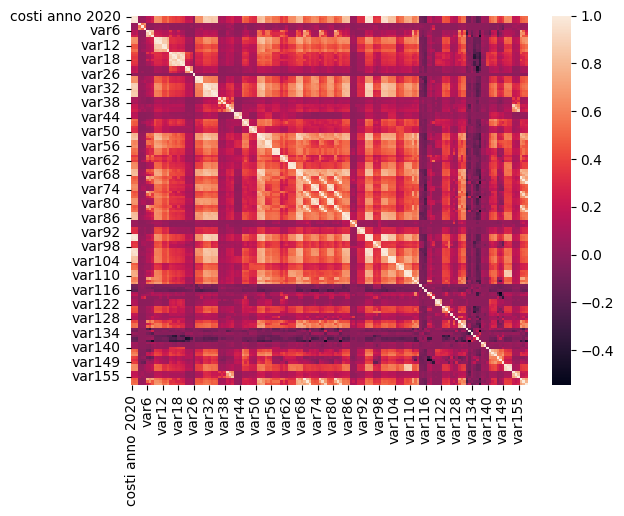

In [9]:
sns.heatmap(df.corr())

In [10]:
target = 'costi anno 2020'
X = df.drop(target,axis=1).values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=667, )

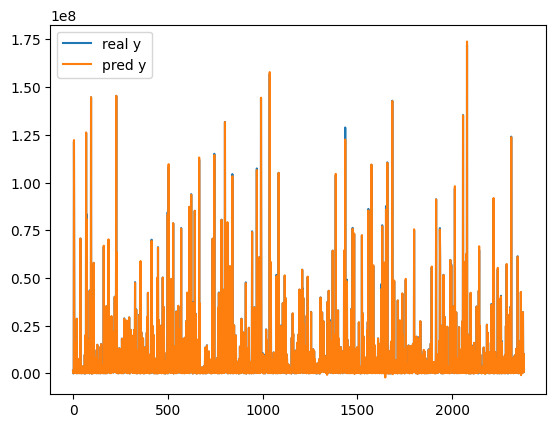

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

lenght = y_pred.shape[0]
x = np.linspace(0, lenght, lenght)

plt.plot(x, y_test, label = 'real y')
plt.plot(x, y_pred, label = 'pred y')
plt.legend()

In [13]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9992873968797031

In [15]:
import joblib

joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [16]:
model2 = joblib.load('linear_regression_model.pkl')
model2

LinearRegression()